In [1]:
pip install matplotlib numpy TensorFlow tensorflow_hub pillow

In [1]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

In [2]:
def load_image(image_path, image_size=(512, 256)):
    img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

In [9]:
def visualize(images, titles=('',)):
    noi = len(images)
    print(noi)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    print(grid_look)
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
        plt.savefig("final.jpg")
    plt.show()

In [4]:
original_image = load_image("th (4).jpg")
style_image = load_image("Back-The-Blue-T-Shirt-Ladies-V-Neck.jpg")

2


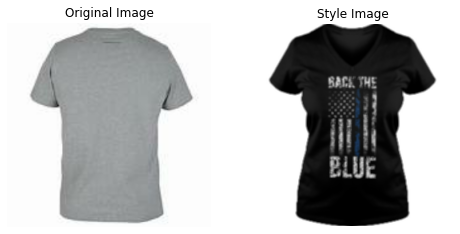

In [5]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')
visualize([original_image, style_image], ['Original Image', 'Style Image'])

In [6]:
stylize_model = tf_hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [7]:
results = stylize_model(tf.constant(original_image), tf.constant(style_image))
stylized_image = results[0]

3
GridSpec(1, 3, width_ratios=[256, 254, 256])


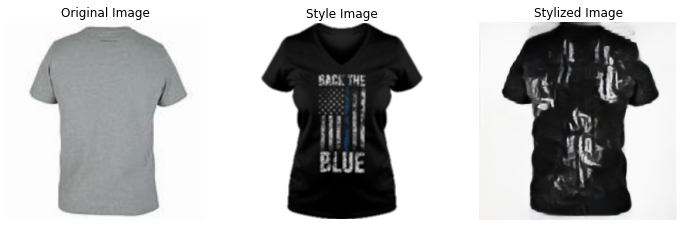

In [10]:
visualize([original_image, style_image, stylized_image], titles=['Original Image', 'Style Image', 'Stylized Image'])

In [27]:
def export_image(tf_img):
    tf_img = tf_img*255
    tf_img = np.array(tf_img, dtype=np.uint8)
    if np.ndim(tf_img)>3:
        assert tf_img.shape[0] == 1
        img = tf_img[0]
    return PIL.Image.fromarray(img)

In [28]:
export_image(stylized_image).save("my_stylized_photo.png")